# **Falha em Equipamentos**

## **Análise Exploratória** 

### Análise estatística descritiva e vizualização do dataset.

In [ ]:
# Bibliotecas iniciais para análise exploratória.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# Carregando a base de dados.

df = pd.read_excel('O_G_Equipment_Data.xlsx')
df.head(2)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False


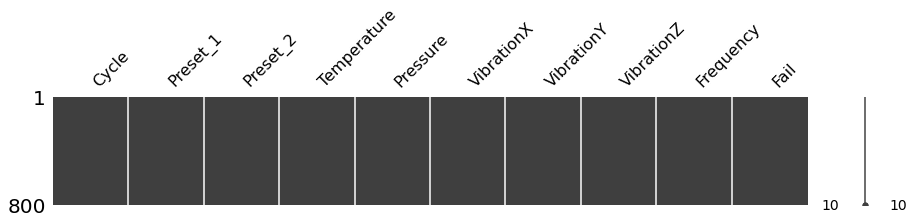

In [ ]:
# Verificando a existência de dados faltantes na base de dados.

msno.matrix(df, figsize=(15,2));

In [ ]:
# Código usado para verificar quantidade de linhas e colunas.

df.shape

(800, 10)

In [ ]:
# Fazendo a contabilidade dos valores presentes no atributo antes da codificação.

print(df['Fail'].value_counts())

False    734
True      66
Name: Fail, dtype: int64


## **Exploração do atributo Fail**

In [ ]:
# Codificando o atributo Fail (Necessário para criação dos gráficos informativos).

labels = df['Fail'].astype('category').cat.categories.tolist()
replace_Fail = {'Fail':{False: 10, True: 100}}

print(replace_Fail)

{'Fail': {False: 10, True: 100}}


In [ ]:
# Inserindo o atributo cofificado ao dataset.

df = df.replace(replace_Fail)
df.head(2)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,10
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,10


In [ ]:
""" Criação dois datasets: um contendo apenas os equipamentos sem falha, e outro com os
equipamentos em falha. Para então posteriormente verificar a correlação estatística, bem como
outras diferentes análise exploratória com os dados. """

# Dataset contendo apenas dados com equipamentos em falha.
df_WF = df.copy()
df_WF.drop(df_WF[(df_WF['Fail'] == 10)].index, inplace=True)
df_WF.head(1)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
12,13,1,1,79.806509,103.129738,120.753103,134.500905,115.873197,76.562856,100


In [ ]:
print(df_WF['Fail'].value_counts())

100    66
Name: Fail, dtype: int64


In [ ]:
# Dataset contendo apenas dados com equipamentos sem apresentat falha.
df_WOF = df.copy()
df_WOF.drop(df_WOF[(df_WOF['Fail'] == 100)].index, inplace=True)
df_WOF.head(1)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.45452,44.48325,10


In [ ]:
print(df_WOF['Fail'].value_counts())

10    734
Name: Fail, dtype: int64


#**Anáise de Correlação Estatística**


In [ ]:
df.describe()

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1.988750,4.551250,69.263494,78.997945,73.860275,72.786878,71.866211,68.223449,17.425000
std,231.0844,0.805875,2.293239,25.536252,32.501834,31.229631,32.739745,27.844616,29.138702,24.776738
min,1.0000,1.000000,1.000000,2.089354,3.480279,3.846343,10.057744,18.784169,4.380101,10.000000
25%,200.7500,1.000000,3.000000,51.040134,55.508564,50.752461,48.523982,50.787638,45.861762,10.000000
50%,400.5000,2.000000,5.000000,65.906716,75.014848,69.394953,65.504770,69.319237,65.664252,10.000000
75%,600.2500,3.000000,7.000000,80.527220,99.302530,90.195059,94.075572,88.891205,90.097457,10.000000
max,800.0000,3.000000,8.000000,255.607829,189.995681,230.861142,193.569947,230.951134,178.090303,100.000000


In [ ]:
# Correlação entre os dados.

df.corr().style.format("{:.2}").background_gradient(cmap=("coolwarm"),axis=1)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
Cycle,1.0,0.051,0.072,0.097,0.1,0.097,0.091,0.088,0.013,0.15
Preset_1,0.051,1.0,0.055,-0.0021,0.008,0.032,-0.063,-0.044,-0.055,-0.047
Preset_2,0.072,0.055,1.0,0.034,-0.013,-0.02,-0.0049,0.00018,0.03,-0.017
Temperature,0.097,-0.0021,0.034,1.0,0.42,0.24,0.36,0.38,0.17,0.27
Pressure,0.1,0.008,-0.013,0.42,1.0,0.44,0.39,0.26,0.38,0.35
VibrationX,0.097,0.032,-0.02,0.24,0.44,1.0,0.22,0.51,0.015,0.25
VibrationY,0.091,-0.063,-0.0049,0.36,0.39,0.22,1.0,0.51,0.47,0.46
VibrationZ,0.088,-0.044,0.00018,0.38,0.26,0.51,0.51,1.0,0.26,0.37
Frequency,0.013,-0.055,0.03,0.17,0.38,0.015,0.47,0.26,1.0,0.33
Fail,0.15,-0.047,-0.017,0.27,0.35,0.25,0.46,0.37,0.33,1.0


## **Análise Estatística Descritica**

É possível observar que o atributo **Pressure** está diretamente correlacionado ao atributo VibrationY.

Logo, como o objetivo é evitar as falhas, é possível entender que a variação da pressão é uma variável a ser controlada, a fim de se evistar as falhas.


In [ ]:
# Valores Estatísticos da Pressão no Dataset COM AS FALHA

P1 = df_WF['Pressure'].values

print('A pressão máxina é:',P1.max())
print('A Pressão mínima é:',P1.min())
print('A média da Pressão é:',P1.mean())
print('O desvio Padrão da Pressão é:',np.std(P1))

A pressão máxina é: 189.9956810944594
A Pressão mínima é: 50.8220022131057
A média da Pressão é: 116.42254028832454
O desvio Padrão da Pressão é: 29.81161064309384


In [ ]:
# Valores Estatísticos da Pressão no Dataset SEM AS FALHAS

P2 = df_WOF['Pressure'].values

print('A pressão máxina é:',P2.max())
print('A Pressão mínima é:',P2.min())
print('A média da Pressão é:',P2.mean())
print('O desvio Padrão da Pressão é:',np.std(P2))

A pressão máxina é: 185.40640059067692
A Pressão mínima é: 3.480278691595548
A média da Pressão é: 75.63279041184637
O desvio Padrão da Pressão é: 30.54078946077085


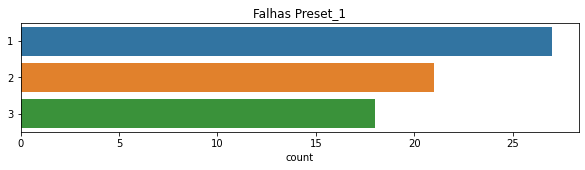

In [ ]:
'''Código utilizado para saber a proporção quando HOUVE FALHAS por Preset_1.'''

p1 = df[df['Fail']==100]['Preset_1'].values

plt.subplots(figsize= (10,2))

sns.countplot(y=p1)
plt.title("Falhas Preset_1")
plt.show()

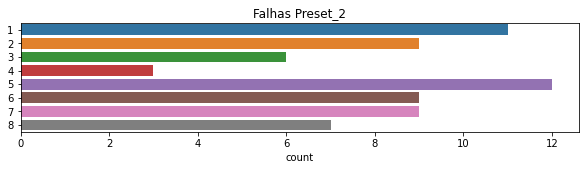

In [ ]:
'''Código utilizado para saber a proporção quando HOUVE FALHAS por Preset_2.'''

p2 = df[df['Fail']==100]['Preset_2'].values

plt.subplots(figsize= (10,2))

sns.countplot(y=p2)
plt.title("Falhas Preset_2")
plt.show()

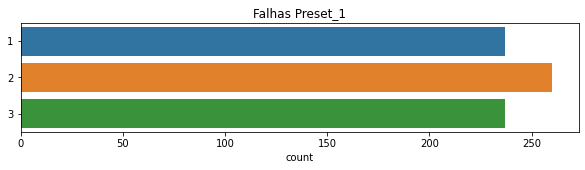

2    260
3    237
1    237
Name: Preset_1, dtype: int64


In [ ]:
'''Código utilizado para saber a configuração do esquipamento onde NÃO HOUVE
FALHAS (Preset_1).'''

p1 = df[df['Fail']==10]['Preset_1'].values

plt.subplots(figsize= (10,2))

sns.countplot(y=p1)
plt.title("Falhas Preset_1")
plt.show()

print(df_WOF['Preset_1'].value_counts())

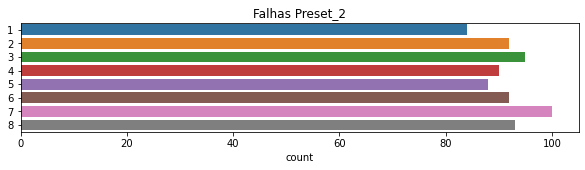

7    100
3     95
8     93
6     92
2     92
4     90
5     88
1     84
Name: Preset_2, dtype: int64


In [ ]:
'''Código utilizado para saber a configuração do esquipamento onde NÃO HOUVE
FALHAS (Preset_2).'''

p2 = df[df['Fail']==10]['Preset_2'].values

plt.subplots(figsize= (10,2))

sns.countplot(y=p2)
plt.title("Falhas Preset_2")
plt.show()

print(df_WOF['Preset_2'].value_counts())

## **Série Temporal para exploração das Falhas por cada atributo.**

In [ ]:
!pip install -U datapane
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 7.4 MB/s 
     |████████████████████████████████| 46 kB 5.6 MB/s 
     |████████████████████████████████| 97 kB 9.4 MB/s 
     |████████████████████████████████| 45 kB 4.7 MB/s 
     |████████████████████████████████| 193 kB 61.4 MB/s 
     |████████████████████████████████| 596 kB 56.8 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 55 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 5.2 MB/s 
  Created wheel for face: filename=face-20.1.1-py3-none-any.whl size=51091 sha256=ee203956312a268378db322b4af04ffb8a81edd224e4bb502a564ac2ec947c83
  Stored in directory: /root/.cache/pip/wheels/67/03/c2/76d2e1e694852ce409ac2938b9f461bc0fdf3789901e7bb1f0
  Created wheel for micawber: filename=micawber-0.5.4-py3-none-any.whl size=22373 sha256=c9799f411f7d8337777a6116aad015d4c6a0a89e91dceefd5

In [ ]:
import datapane as dp
import chart_studio.plotly as py
import chart_studio
import os
plt.rcParams.update({'font.size': 22})
%matplotlib inline

In [ ]:
# Realizar o login do datapane a partir da API disponibilizada pelo aplicação
!datapane login --token=715ffba6fea8179028c770596c699c494c0df0a6

Connected successfully to https://datapane.com as cristovaosouzajunior@gmail.com


### **Temperature**

In [ ]:
import plotly.express as px 

# On the YAML of code "back-end", modify the section yaml.load(f) to yaml.full_load(f)

# Trecho responsável por identificar e definir quais variáveis estarão contidas no eixo Y
equip_features = ['Temperature','Fail']

# desenvolvimento da visualização, organização e visualização
fig = px.line(df, x='Cycle', y=equip_features)
fig.show()

# trecho responsável por criar e publicar o relatório no datapane
dp.Report(
    dp.Plot(fig),
    dp.DataTable(df)
).upload(name="Failure over Cycle")

Bokeh version 2.3.3 is not supported, these plots may not display correctly, please install version ~=2.2.0


Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/, or edit your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/edit/.


### Pressure

In [ ]:
# Trecho responsável por identificar e definir quais variáveis estarão contidas no eixo Y
equip_features = ['Pressure','Fail']

# desenvolvimento da visualização, organização e visualização
fig = px.line(df, x='Cycle', y=equip_features)
fig.show()

# trecho responsável por criar e publicar o relatório no datapane
dp.Report(
    dp.Plot(fig),
    dp.DataTable(df)
).upload(name="Failure over Cycle")

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/, or edit your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/edit/.


### Temperature X Pressure

In [ ]:
# Trecho responsável por identificar e definir quais variáveis estarão contidas no eixo Y
equip_features = ['Temperature','Pressure','Fail']

# desenvolvimento da visualização, organização e visualização
fig = px.line(df, x='Cycle', y=equip_features, title = 'TEMPERATURE x PRESSURE')
fig.show()

# trecho responsável por criar e publicar o relatório no datapane
dp.Report(
    dp.Plot(fig),
    dp.DataTable(df)
).upload(name="Failure over Cycle")

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/, or edit your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/edit/.


### Vibration X Y Z

In [ ]:
# Trecho responsável por identificar e definir quais variáveis estarão contidas no eixo Y
equip_features = ['VibrationX','VibrationY', 'VibrationZ','Fail']

# desenvolvimento da visualização, organização e visualização
fig = px.line(df, x='Cycle' ,y=equip_features)
fig.show()
# trecho responsável por criar e publicar o relatório no datapane
dp.Report(
    dp.Plot(fig),
    dp.DataTable(df)
).upload(name="Failure over Cycle")

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/, or edit your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/edit/.


### Frequency

In [ ]:
# Trecho responsável por identificar e definir quais variáveis estarão contidas no eixo Y
equip_features = ['Frequency','Fail']

# desenvolvimento da visualização, organização e visualização
fig = px.line(df, x='Cycle' ,y=equip_features)
fig.show()
# trecho responsável por criar e publicar o relatório no datapane
dp.Report(
    dp.Plot(fig),
    dp.DataTable(df)
).upload(name="Failure over Cycle")

Uploading report and associated data - *please wait...*
Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info at https://docs.datapane.com/reports/blocks/layout-pages-and-selects
Report successfully uploaded. View and share your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/, or edit your report at https://datapane.com/reports/87NVEe7/failure-over-cycle/edit/.
